In [1]:
import pandas as pd
from datetime import datetime
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
from MCForecastTools import MCSimulation

%matplotlib inline

In [47]:
data = yf.download("BTC-USD, ETH-USD, DOGE-USD, XMR-USD, XEM-USD, BNB-USD" 
                   , start="2018-01-01", end="2022-10-26")


[*********************100%***********************]  6 of 6 completed


In [48]:
data_df = pd.DataFrame(data)
data_df = data_df.drop(columns = ['Adj Close', 'High', 'Low', 'Open', 'Volume'])
data_df.tail()

Close                                                 \
               BNB-USD       BTC-USD  DOGE-USD      ETH-USD   XEM-USD   
Date                                                                    
2022-10-21  270.038422  19172.468750  0.059334  1299.946411  0.037247   
2022-10-22  270.479492  19208.189453  0.059694  1314.299194  0.037396   
2022-10-23  276.008179  19567.007812  0.060347  1363.447021  0.038073   
2022-10-24  273.977417  19345.572266  0.059506  1344.998535  0.037619   
2022-10-25  284.432526  20095.857422  0.062882  1461.665405  0.038556   

                        
               XMR-USD  
Date                    
2022-10-21  140.729477  
2022-10-22  142.801865  
2022-10-23  144.488083  
2022-10-24  143.225418  
2022-10-25  144.185669

In [49]:
data_df.isna().sum()

Close  BNB-USD     0
       BTC-USD     0
       DOGE-USD    0
       ETH-USD     0
       XEM-USD     0
       XMR-USD     0
dtype: int64

In [50]:
daily_change = data_df.pct_change()
daily_change.tail()

Close                                                  
             BNB-USD   BTC-USD  DOGE-USD   ETH-USD   XEM-USD   XMR-USD
Date                                                                  
2022-10-21  0.002849  0.006231 -0.003393  0.013050  0.010636 -0.003386
2022-10-22  0.001633  0.001863  0.006067  0.011041  0.004000  0.014726
2022-10-23  0.020440  0.018680  0.010939  0.037395  0.018104  0.011808
2022-10-24 -0.007358 -0.011317 -0.013936 -0.013531 -0.011924 -0.008739
2022-10-25  0.038160  0.038783  0.056734  0.086741  0.024908  0.006704

<AxesSubplot:xlabel='Date'>

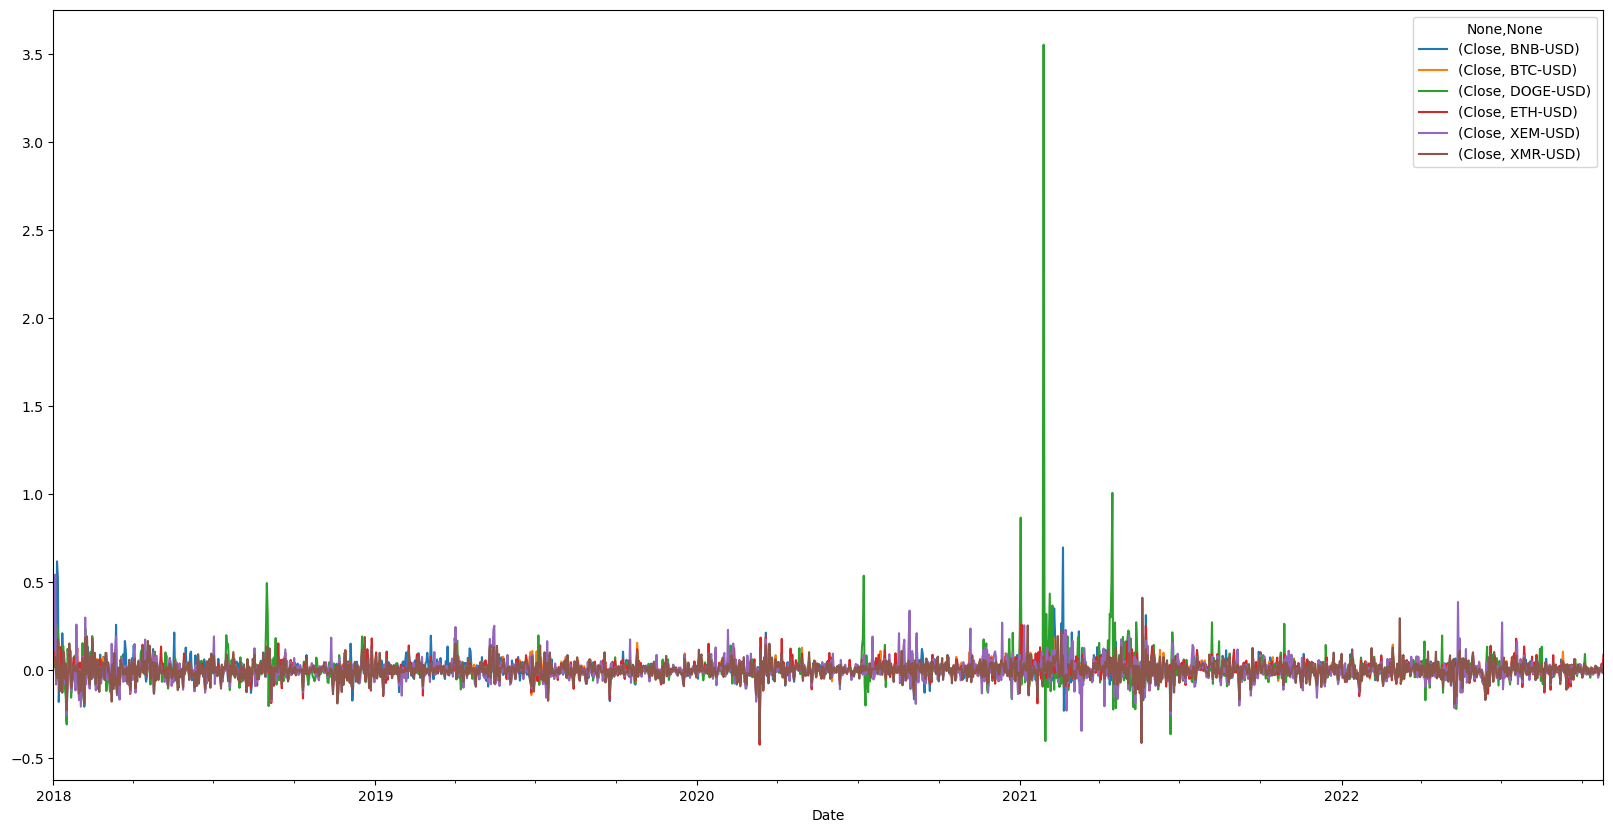

In [51]:
daily_change.plot(figsize=(20,10))

In [53]:
daily_change.describe()

Close                                                      \
           BNB-USD      BTC-USD     DOGE-USD      ETH-USD      XEM-USD   
count  1758.000000  1758.000000  1758.000000  1758.000000  1758.000000   
mean      0.003677     0.000982     0.004653     0.001647     0.000037   
std       0.059148     0.038729     0.111696     0.050178     0.062168   
min      -0.419046    -0.371695    -0.402570    -0.423472    -0.344734   
25%      -0.021774    -0.015838    -0.024116    -0.022255    -0.029321   
50%       0.000861     0.001165    -0.001279     0.000797     0.000487   
75%       0.027529     0.017665     0.019117     0.027014     0.026668   
max       0.697604     0.187465     3.555466     0.259475     0.543105   

                    
           XMR-USD  
count  1758.000000  
mean      0.000926  
std       0.053199  
min      -0.413860  
25%      -0.024447  
50%       0.001702  
75%       0.028358  
max       0.411925

In [54]:
average = daily_change.mean()
average = average.sort_values()
average

Close  XEM-USD     0.000037
       XMR-USD     0.000926
       BTC-USD     0.000982
       ETH-USD     0.001647
       BNB-USD     0.003677
       DOGE-USD    0.004653
dtype: float64

In [55]:
std = daily_change.std()
std = std.sort_values()
std

Close  BTC-USD     0.038729
       ETH-USD     0.050178
       XMR-USD     0.053199
       BNB-USD     0.059148
       XEM-USD     0.062168
       DOGE-USD    0.111696
dtype: float64

In [56]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_change).cumprod()
cumulative_returns.head()

Close                                                  
             BNB-USD   BTC-USD  DOGE-USD   ETH-USD   XEM-USD   XMR-USD
Date                                                                  
2018-01-01       NaN       NaN       NaN       NaN       NaN       NaN
2018-01-02  1.050289  1.097011  1.026490  1.144702  1.114090  1.068044
2018-01-03  1.133253  1.113039  1.046133  1.246012  1.719158  1.147840
2018-01-04  1.094999  1.142196  1.082501  1.269570  1.579467  1.122728
2018-01-05  1.772774  1.276213  1.365698  1.291311  1.528554  1.072275

<AxesSubplot:xlabel='Date'>

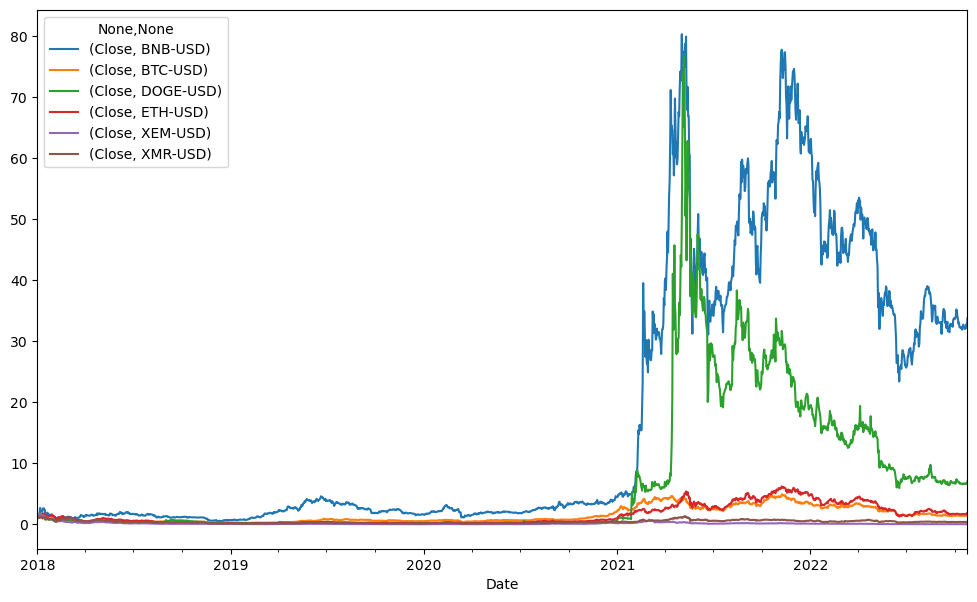

In [57]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(12,7))

<AxesSubplot:xlabel='None-None', ylabel='None-None'>

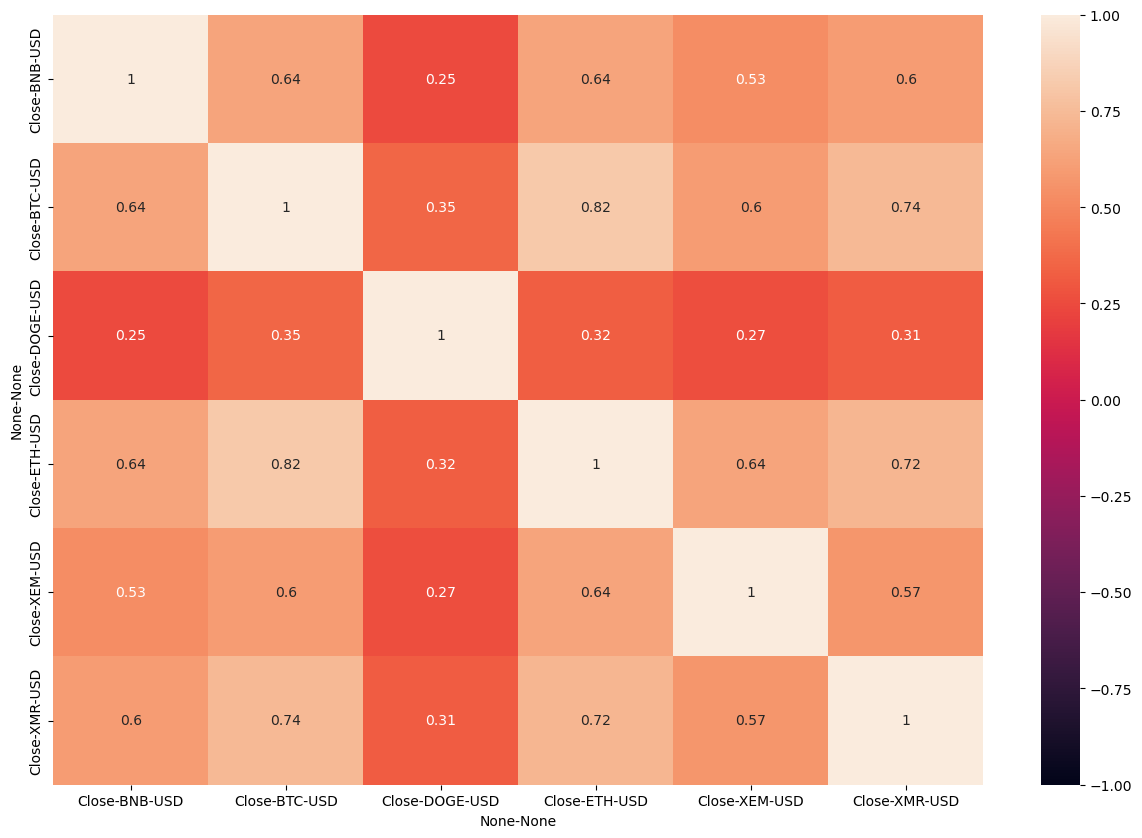

In [58]:
# Calculate the correlation
correlation = daily_change.corr()
# Display correlation matrix
plt.figure(figsize = (15,10))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)

In [37]:
btc = yf.download("BTC-USD" 
                   , start="2018-01-01", end="2020-12-31")

btc = pd.concat([btc], axis=1, keys=["BTC"])
btc.rename(columns = {"Open": "open", "High" : "high", "Low" : "low", "Close" : "close", "Adj Close" : "adj close", "Volume" : "volume"}, inplace = True)

btc.head()

[*********************100%***********************]  1 of 1 completed


BTC                                            \
                    open          high           low         close   
Date                                                                 
2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   

                                       
               adj close       volume  
Date                                   
2018-01-01  13657.200195  10291200000  
2018-01-02  14982.099609  16846600192  
2018-01-03  15201.000000  16871900160  
2018-01-04  15599.200195  21783199744  
2018-01-05  17429.500000  23840899072

In [38]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast five years daily returns
mc_btc = MCSimulation(
    portfolio_data = btc,
    num_simulation = num_sims,
    num_trading_days = 365
)

In [39]:
mc_btc.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


C:\Users\Lucas\Desktop\fintech_project_1\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994963,0.958471,1.043580,1.007268,1.053488,0.979706,1.033138,1.057450,0.967202,1.010961,...,0.960152,1.021841,0.968040,0.946033,1.011605,0.935035,0.912092,0.949074,0.998850,0.957603
2,0.978733,0.925492,1.098443,0.991689,1.006303,1.008673,1.058406,1.055861,1.022061,1.010598,...,1.052145,1.059423,0.946870,0.995447,0.943774,0.961260,0.933092,0.933946,1.013005,0.950648
3,1.039654,0.904043,1.075376,1.115085,0.974357,1.084491,1.035022,1.014454,0.983435,1.069559,...,1.002242,1.027095,0.964857,0.967742,0.988521,1.037784,0.966740,0.973111,0.982436,0.920209
4,1.052462,0.925936,1.121669,1.132624,0.942448,1.084181,1.058246,1.024777,1.009103,1.080352,...,1.023007,0.995804,0.978599,0.965259,0.998956,1.018985,0.957049,0.960908,1.048243,0.930601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2.116854,0.436639,2.872466,3.485495,0.356759,2.929976,0.682944,0.909527,1.793633,0.857317,...,0.908071,0.974979,4.030975,1.804470,2.252255,0.285564,4.506306,0.577537,0.770198,4.329037
362,2.125323,0.430358,2.800776,3.473938,0.354290,2.673078,0.713404,0.930949,1.822611,0.865565,...,0.881503,0.955740,4.144685,1.930098,2.275380,0.274762,4.867677,0.603259,0.750985,4.319843
363,2.174202,0.381771,2.772315,3.459389,0.326280,2.643575,0.680418,0.821322,1.776959,0.868161,...,0.894872,0.929382,3.977623,1.988560,2.090320,0.275048,4.937595,0.617982,0.740398,4.262996
364,2.222602,0.408196,2.577497,3.520427,0.322283,2.679151,0.663460,0.858712,1.755916,0.857787,...,0.858738,0.912137,3.921799,2.001191,2.054359,0.255799,5.080696,0.590472,0.730799,4.288852


In [40]:
# Compute summary statistics from the simulated daily returns
simulated_btc_returns_data = {
    "mean": list(mc_btc.simulated_return.mean(axis=1)),
    "median": list(mc_btc.simulated_return.median(axis=1)),
    "min": list(mc_btc.simulated_return.min(axis=1)),
    "max": list(mc_btc.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
btc_simulated_returns = pd.DataFrame(simulated_btc_returns_data)

# Display sample data
btc_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.001215,1.001822,0.852783,1.128049
2,1.004601,1.002605,0.841495,1.171130
3,1.006240,1.002413,0.822425,1.238026
4,1.006934,1.004135,0.780167,1.272796


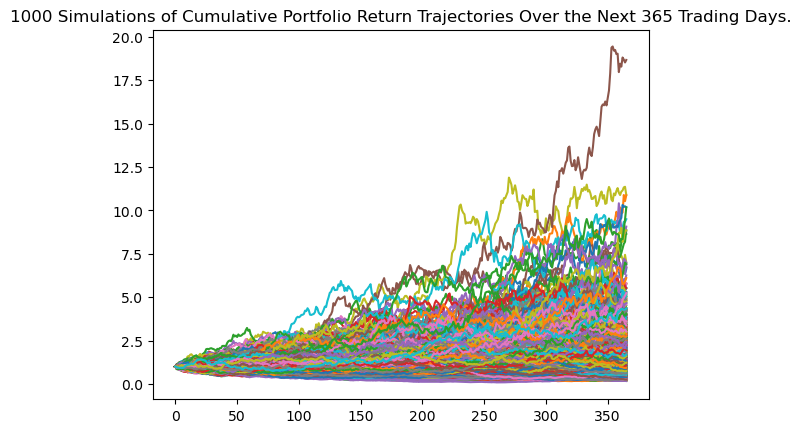

In [44]:
btc_line_plot = mc_btc.plot_simulation()

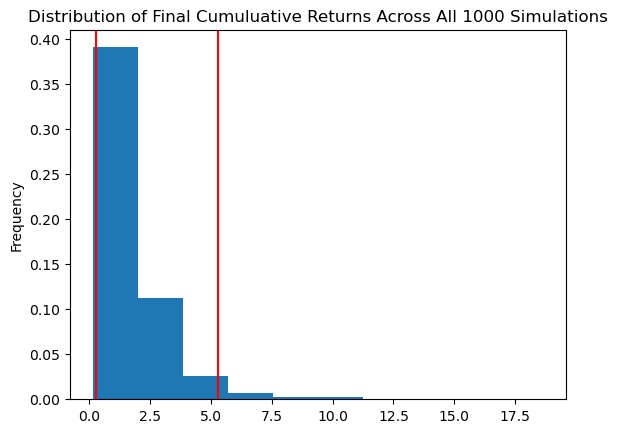

In [45]:
btc_dist_plot = mc_btc.plot_distribution()

<AxesSubplot:title={'center':'Simulated Cumulative Return Behavior of BTC Stock Over the Next 5 Years'}>

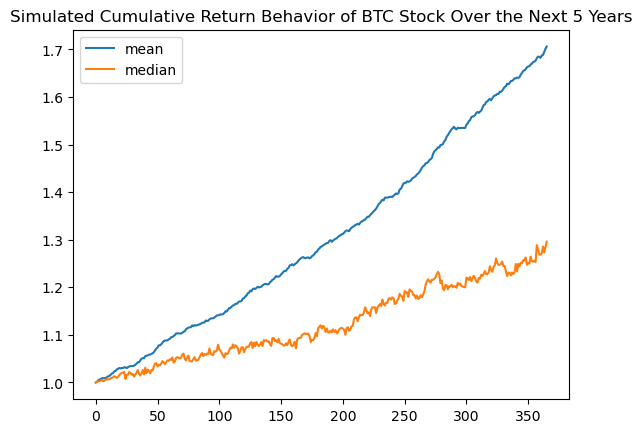

In [46]:
btc_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of BTC Stock Over the Next 5 Years")

In [35]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
btc_cumulative_pnl = initial_investment * btc_simulated_returns

# Display sample data
btc_cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10003.712915,9999.255152,8840.312829,11332.921392
2,10007.745110,10004.434078,8410.821777,11759.765501
3,9995.617096,9964.197826,7908.040188,12036.490631
4,10020.090645,9989.878182,7760.437438,12831.769430


<AxesSubplot:title={'center':'Simulated Outcomes Behavior of BTC Over the Next 5 Years'}>

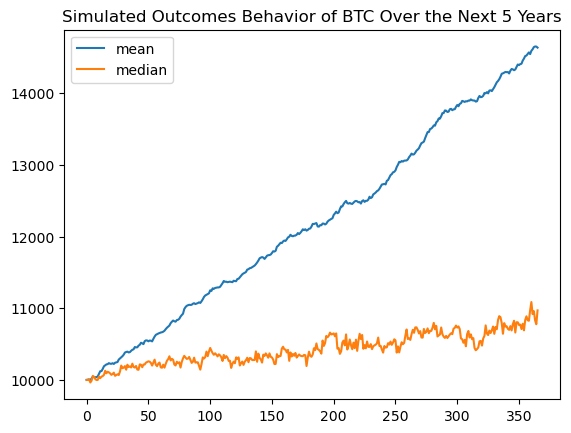

In [36]:
# Use the 'plot' function to create a chart of the simulated profits/losses
btc_cumulative_pnl[['mean','median']].plot(title="Simulated Outcomes Behavior of BTC Over the Next 5 Years")

In [21]:
eth = yf.download("ETH-USD" 
                   , start="2018-01-01", end="2022-10-26")

eth = pd.concat([eth], axis=1, keys=["ETH"])
eth.rename(columns = {"Open": "open", "High" : "high", "Low" : "low", "Close" : "close", "Adj Close" : "adj close", "Volume" : "volume"}, inplace = True)

eth.head()

[*********************100%***********************]  1 of 1 completed


ETH                                                   \
                  open         high         low       close   adj close   
Date                                                                      
2018-01-01  755.757019   782.530029  742.004028  772.640991  772.640991   
2018-01-02  772.346008   914.830017  772.346008  884.443970  884.443970   
2018-01-03  886.000000   974.471008  868.450989  962.719971  962.719971   
2018-01-04  961.713013  1045.079956  946.085999  980.921997  980.921997   
2018-01-05  975.750000  1075.390015  956.325012  997.719971  997.719971   

                        
                volume  
Date                    
2018-01-01  2595760128  
2018-01-02  5783349760  
2018-01-03  5093159936  
2018-01-04  6502859776  
2018-01-05  6683149824

In [22]:
# Configure a Monte Carlo simulation to forecast five years daily returns
mc_eth = MCSimulation(
    portfolio_data = eth,
    num_simulation = num_sims,
    num_trading_days = 365*5
)

In [23]:
mc_eth.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Lucas\Desktop\fintech_project_1\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.958754,1.001309,0.945372,1.113517,1.053677,0.974644,0.976112,0.940948,1.085941,0.982544,...,0.962974,1.009321,0.907615,1.059240,1.082100,0.987720,1.052935,1.084354,1.082846,1.022618
2,1.054088,0.955293,0.936213,1.083537,1.101509,0.979894,0.948251,0.927037,1.175595,0.952397,...,0.885618,1.048894,0.963714,0.999759,1.116791,0.998928,1.023260,1.092174,1.056503,1.002323
3,1.052881,0.915731,0.921241,1.043569,1.122055,0.973618,1.041049,0.968034,1.132656,0.938864,...,0.891569,1.081170,1.009285,0.973227,1.125190,0.994206,1.024153,1.101921,1.059749,0.950867
4,1.038907,1.026796,0.872765,0.969800,1.196307,1.044007,1.054322,0.972598,1.092015,0.946426,...,0.902517,1.003585,1.003080,0.940067,1.133865,1.032708,0.993519,1.104777,1.120641,1.003408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,0.365491,1.747959,0.114592,24.781276,0.028413,1.742575,16.548750,1.524908,0.959552,0.068773,...,1.031620,0.121314,4.599852,3.337594,239.328527,0.783686,0.041485,147.030894,1.488064,0.209395
1822,0.347424,1.677804,0.113172,23.442033,0.028446,1.622794,16.562981,1.580033,0.932472,0.069955,...,1.082601,0.120563,4.590299,3.250224,241.011246,0.795425,0.039474,131.170033,1.636687,0.215150
1823,0.358790,1.685146,0.120557,24.348573,0.027779,1.604912,16.358340,1.568107,0.943053,0.070461,...,1.070650,0.118438,4.560145,3.275794,240.944018,0.801298,0.034927,131.579967,1.578012,0.214212
1824,0.391661,1.738927,0.130348,23.646575,0.028917,1.567601,15.883696,1.547183,0.883561,0.067591,...,1.076467,0.119109,4.416255,3.532738,249.935629,0.757544,0.031984,129.115983,1.513402,0.199593


In [24]:
# Compute summary statistics from the simulated daily returns
simulated_eth_returns_data = {
    "mean": list(mc_eth.simulated_return.mean(axis=1)),
    "median": list(mc_eth.simulated_return.median(axis=1)),
    "min": list(mc_eth.simulated_return.min(axis=1)),
    "max": list(mc_eth.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
eth_simulated_returns = pd.DataFrame(simulated_eth_returns_data)

# Display sample data
eth_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000893,1.001145,0.847452,1.174749
2,1.003059,1.001131,0.749151,1.241145
3,1.004222,1.000518,0.748381,1.305919
4,1.005109,1.001302,0.722167,1.353941


<AxesSubplot:title={'center':'Simulated Cumulative Return Behavior of ETH Stock Over the Next 5 Years'}>

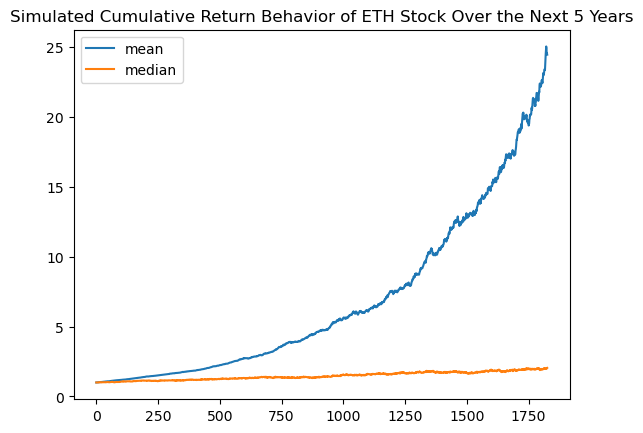

In [25]:
eth_simulated_returns[['mean', 'median']].plot(title="Simulated Cumulative Return Behavior of ETH Stock Over the Next 5 Years")